# 👕T-Shirt Size prediction using KNN
- In this project we going to predict the T-Shirt size based on the height and weight 
- K-Nearest Neighbour model for the prediction 

## 📊Loading T-shirt size dataset 
- To load the dataset we will be using pandas library.
- In pandas library we have csv_read() to read the csv file. 

In [109]:
import pandas as pd 
df = pd.read_csv("TShirt_size.csv")
df

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


- Here we have load the t-shirt dataset 
- now we have to convert the text data to numeric data 
- so we will convert the size column to numeric values 
- To do this we  will be using get_dummies function from pandas library 

## 🔢converting text data to numeric values 

In [110]:
#creating a  copy of the data set so it does not hamper the actual dataset 
df_label = df
df_label

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [111]:
#converting text into numeric 
df_label = pd.get_dummies(df_label,columns=['T Shirt Size'])

In [112]:
df_label


,Height (in cms),Weight (in kgs),T Shirt Size_L,T Shirt Size_M
0,158,58,False,True
1,158,59,False,True
2,158,63,False,True
3,160,59,False,True
4,160,60,False,True
5,163,60,False,True
6,163,61,False,True
7,160,64,True,False
8,163,64,True,False
9,165,61,True,False


In [113]:
#dropping the T Shirt Size_M as we can work with T Shirt Size_L 
df_label=df_label.drop('T Shirt Size_M',axis=1)
df_label

,Height (in cms),Weight (in kgs),T Shirt Size_L
0,158,58,False
1,158,59,False
2,158,63,False
3,160,59,False
4,160,60,False
5,163,60,False
6,163,61,False
7,160,64,True
8,163,64,True
9,165,61,True


## 📈Data Visualisation 

In [114]:
import matplotlib.pyplot as plt 
import seaborn as sns 

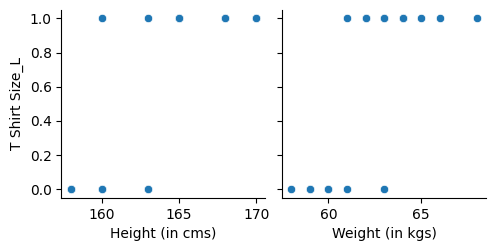

In [115]:
#here 1 represents L size and M represents 0 
sns.pairplot(df_label,x_vars=['Height (in cms)','Weight (in kgs)'],y_vars='T Shirt Size_L')
plt.show()

# 📊Standardizing the data 
- using MinMaxscaler we can standardize the data 

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()

In [117]:
cols=['Height (in cms)','Weight (in kgs)']
df_label[cols] = scaler.fit_transform(df_label[cols])

In [118]:
df_label

,Height (in cms),Weight (in kgs),T Shirt Size_L
0,0.000000,0.0,False
1,0.000000,0.1,False
2,0.000000,0.5,False
3,0.166667,0.1,False
4,0.166667,0.2,False
5,0.416667,0.2,False
6,0.416667,0.3,False
7,0.166667,0.6,True
8,0.416667,0.6,True
9,0.583333,0.3,True


In [119]:
#converting 'T Shirt Size_L' to numeric value  
df_label['T Shirt Size_L'] = df_label['T Shirt Size_L'].astype(int)

In [120]:
# here in 'T Shirt Size_L' (1) represents 'L size' and (0) represents 'M size'
df_label

,Height (in cms),Weight (in kgs),T Shirt Size_L
0,0.000000,0.0,0
1,0.000000,0.1,0
2,0.000000,0.5,0
3,0.166667,0.1,0
4,0.166667,0.2,0
5,0.416667,0.2,0
6,0.416667,0.3,0
7,0.166667,0.6,1
8,0.416667,0.6,1
9,0.583333,0.3,1


## 🧑‍🔧Traning and Testing Data 

In [121]:
x =df_label[['Height (in cms)','Weight (in kgs)']]
y = df_label['T Shirt Size_L']

In [122]:
#using sklearn to import train test and fitting to the model
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size= 0.7 , test_size=0.3 , random_state=100)


In [123]:
x_train

,Height (in cms),Weight (in kgs)
6,0.416667,0.3
17,1.000000,1.0
12,0.833333,0.4
5,0.416667,0.2
2,0.000000,0.5
4,0.166667,0.2
10,0.583333,0.4
0,0.000000,0.0
15,1.000000,0.5
7,0.166667,0.6


In [124]:
x_test

,Height (in cms),Weight (in kgs)
9,0.583333,0.3
11,0.583333,0.7
16,1.000000,0.6
13,0.833333,0.5
1,0.000000,0.1
14,0.833333,0.8


In [125]:
y_test

9     1
11    1
16    1
13    1
1     0
14    1
Name: T Shirt Size_L, dtype: int64

# 🤖Loading a Model
- loading a KNN model for prediction.

In [126]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [127]:
#fitting the data into model 
model.fit(x_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


## 📑Predicting Data 

In [129]:
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 1])